In [2]:
import pylab as pl
import pandas as pd
import numpy as np 
import geopandas as gpd 
import urllib 
import requests 
import os 
import io 
import pylab as pl 
import json 
import shapely  
from fiona.crs import from_epsg 
%pylab inline 

import seaborn as sns; sns.set(color_codes=True)
import scipy as sp 
from scipy import stats 

Populating the interactive namespace from numpy and matplotlib


In [3]:
import zipfile
boundries= zipfile.ZipFile(os.getenv('PUIDATA')+"/PolicePrecincts.zip")
boundries.extractall(os.getenv('PUIDATA')+'/Precinct')
boundries = os.getenv('PUIDATA') + '/Precinct/geo_export_0a09432e-ff27-42db-bc05-2cd1edd8280f.shp'

In [4]:
# Reading
collisions=pd.read_csv(os.getenv('PUIDATA')+"/cityacc-en-us.csv", index_col=None)
collisions.head(20)

,﻿GeoCode,GeoCodeLabel,Number_of_Motor_Vehicle_Collisions,Vehicles_or_Motorists_Involved,Injury_or_Fatal_Collisions,MotoristsInjured,MotoristsKilled,PassengInjured,PassengKilled,CyclistsInjured,CyclistsKilled,PedestrInjured,PedestrKilled,Bicycle
0,C,CITYWIDE,18986.0,37719.0,3940.0,2414.0,11.0,1700.0,0.0,493.0,1.0,836.0,15.0,614.0
1,M,MANHATTAN,3914.0,7513.0,654.0,265.0,1.0,201.0,0.0,161.0,0.0,190.0,2.0,220.0
2,001,1st Precinct,275.0,523.0,40.0,25.0,0.0,12.0,0.0,9.0,0.0,5.0,0.0,15.0
3,005,5th Precinct,237.0,455.0,25.0,7.0,0.0,10.0,0.0,8.0,0.0,6.0,0.0,11.0
4,006,6th Precinct,121.0,235.0,12.0,4.0,0.0,1.0,0.0,3.0,0.0,5.0,0.0,7.0
5,007,7th Precinct,132.0,258.0,34.0,19.0,0.0,13.0,0.0,8.0,0.0,7.0,0.0,9.0
6,009,9th Precinct,121.0,216.0,32.0,10.0,0.0,5.0,0.0,11.0,0.0,9.0,1.0,14.0
7,010,10th Precinct,260.0,495.0,24.0,7.0,0.0,11.0,0.0,4.0,0.0,12.0,0.0,8.0
8,013,13th Precinct,209.0,409.0,30.0,10.0,0.0,5.0,0.0,10.0,0.0,9.0,0.0,15.0
9,014,Midtown South Precinct,264.0,493.0,32.0,5.0,0.0,3.0,0.0,9.0,0.0,17.0,0.0,14.0


,﻿GeoCode,GeoCodeLabel,Number_of_Motor_Vehicle_Collisions,Vehicles_or_Motorists_Involved,Injury_or_Fatal_Collisions,MotoristsInjured,MotoristsKilled,PassengInjured,PassengKilled,CyclistsInjured,CyclistsKilled,PedestrInjured,PedestrKilled,Bicycle
2,001,1st Precinct,275.0,523.0,40.0,25.0,0.0,12.0,0.0,9.0,0.0,5.0,0.0,15.0
3,005,5th Precinct,237.0,455.0,25.0,7.0,0.0,10.0,0.0,8.0,0.0,6.0,0.0,11.0
4,006,6th Precinct,121.0,235.0,12.0,4.0,0.0,1.0,0.0,3.0,0.0,5.0,0.0,7.0
5,007,7th Precinct,132.0,258.0,34.0,19.0,0.0,13.0,0.0,8.0,0.0,7.0,0.0,9.0
6,009,9th Precinct,121.0,216.0,32.0,10.0,0.0,5.0,0.0,11.0,0.0,9.0,1.0,14.0
7,010,10th Precinct,260.0,495.0,24.0,7.0,0.0,11.0,0.0,4.0,0.0,12.0,0.0,8.0
8,013,13th Precinct,209.0,409.0,30.0,10.0,0.0,5.0,0.0,10.0,0.0,9.0,0.0,15.0
9,014,Midtown South Precinct,264.0,493.0,32.0,5.0,0.0,3.0,0.0,9.0,0.0,17.0,0.0,14.0
10,017,17th Precinct,291.0,565.0,54.0,24.0,0.0,23.0,0.0,14.0,0.0,9.0,0.0,18.0
11,018,Midtown North Precinct,360.0,672.0,46.0,11.0,0.0,5.0,0.0,14.0,0.0,19.0,0.0,26.0


In [20]:
collisions.columns

Index(['﻿GeoCode', 'GeoCodeLabel', 'Number_of_Motor_Vehicle_Collisions',
       'Vehicles_or_Motorists_Involved', 'Injury_or_Fatal_Collisions',
       'MotoristsInjured', 'MotoristsKilled', 'PassengInjured',
       'PassengKilled', 'CyclistsInjured', 'CyclistsKilled', 'PedestrInjured',
       'PedestrKilled', 'Bicycle'],
      dtype='object')

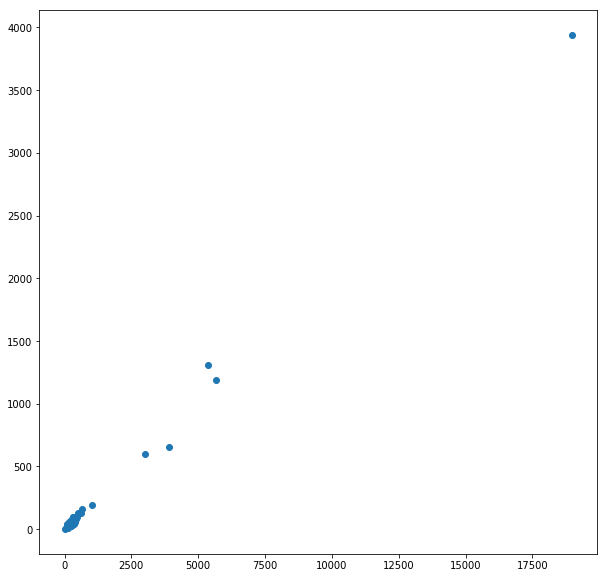

In [23]:
pl.figure(figsize=(10,10))

pl.plot(collisions.Number_of_Motor_Vehicle_Collisions, collisions.Injury_or_Fatal_Collisions, 'o')

In [25]:
collisions[collisions["Number_of_Motor_Vehicle_Collisions"] > 2500]
# Trying to eliminate all the outliers, many are sums of the borough.

,﻿GeoCode,GeoCodeLabel,Number_of_Motor_Vehicle_Collisions,Vehicles_or_Motorists_Involved,Injury_or_Fatal_Collisions,MotoristsInjured,MotoristsKilled,PassengInjured,PassengKilled,CyclistsInjured,CyclistsKilled,PedestrInjured,PedestrKilled,Bicycle
0,C,CITYWIDE,18986.0,37719.0,3940.0,2414.0,11.0,1700.0,0.0,493.0,1.0,836.0,15.0,614.0
1,M,MANHATTAN,3914.0,7513.0,654.0,265.0,1.0,201.0,0.0,161.0,0.0,190.0,2.0,220.0
24,B,BRONX,3003.0,6033.0,601.0,376.0,4.0,282.0,0.0,46.0,1.0,125.0,4.0,53.0
37,K,BROOKLYN,5357.0,10641.0,1306.0,803.0,4.0,656.0,0.0,198.0,0.0,272.0,3.0,233.0
61,Q,QUEENS,5680.0,11485.0,1189.0,833.0,2.0,493.0,0.0,79.0,0.0,208.0,6.0,97.0


In [34]:
collisions_n = collisions.drop(collisions.index[[0,1,24,37,61]])

In [35]:
collisions_n.describe()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


,Number_of_Motor_Vehicle_Collisions,Vehicles_or_Motorists_Involved,Injury_or_Fatal_Collisions,MotoristsInjured,MotoristsKilled,PassengInjured,PassengKilled,CyclistsInjured,CyclistsKilled,PedestrInjured,PedestrKilled,Bicycle
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.0,78.000000,78.000000,78.00000,78.000000,78.000000
mean,256.641026,509.820513,52.948718,32.705128,0.141026,22.666667,0.0,6.435897,0.012821,11.24359,0.192308,8.012821
std,149.290006,301.676904,32.288029,27.292599,0.385596,16.455897,0.0,4.326271,0.113228,6.23602,0.485041,5.565416
min,11.000000,21.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,1032.000000,2047.000000,190.000000,156.000000,2.000000,72.000000,0.0,17.000000,1.000000,41.00000,2.000000,26.000000


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


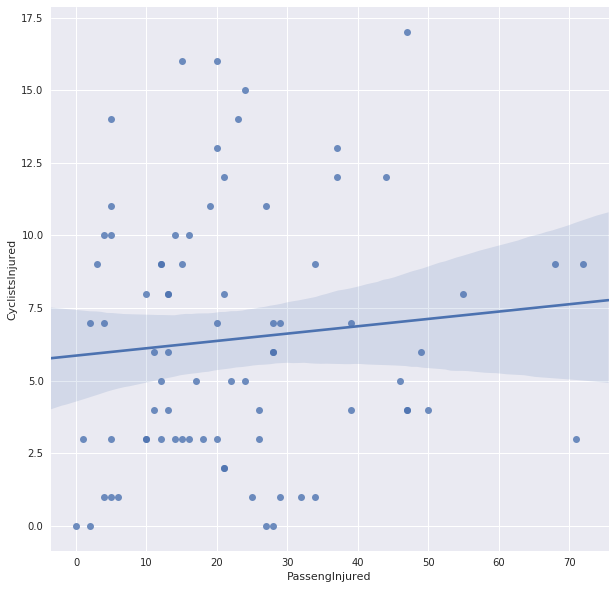

In [43]:
pl.figure(figsize=(10,10))


#tips = sns.load_dataset("tips")
# Reference: http://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot
ax = sns.regplot(x='PassengInjured', y='CyclistsInjured', data=collisions_n)